
Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

LOADING TRAIN AND TEST DATA

In [2]:
df1= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df2= pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')


In [3]:
df1.shape, df2.shape

((1460, 81), (1459, 80))

Missing value percentage

In [4]:
#finding the missing values by applying for loop to find how many percentage of column data is missing
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df1[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [5]:
#finding the missing values by applying for loop to find how many percentage of column data is missing
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in df2.columns if df2[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df2[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0027  % missing values
LotFrontage 0.1556  % missing values
Alley 0.9267  % missing values
Utilities 0.0014  % missing values
MasVnrType 0.011  % missing values
MasVnrArea 0.0103  % missing values
BsmtQual 0.0302  % missing values
BsmtCond 0.0308  % missing values
BsmtExposure 0.0302  % missing values
BsmtFinType1 0.0288  % missing values
BsmtFinType2 0.0288  % missing values
BsmtFullBath 0.0014  % missing values
BsmtHalfBath 0.0014  % missing values
Functional 0.0014  % missing values
FireplaceQu 0.5003  % missing values
GarageType 0.0521  % missing values
GarageYrBlt 0.0535  % missing values
GarageFinish 0.0535  % missing values
GarageQual 0.0535  % missing values
GarageCond 0.0535  % missing values
PoolQC 0.9979  % missing values
Fence 0.8012  % missing values
MiscFeature 0.965  % missing values


DROPPING THE MISSING VALUES MORE THAN 50% OF DATA

<AxesSubplot:>

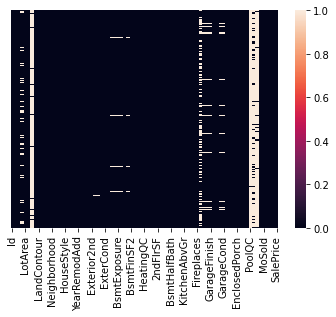

In [6]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True)

<AxesSubplot:>

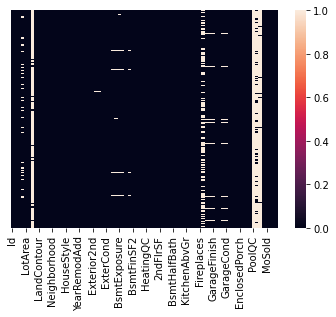

In [7]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True)

In [8]:
df1=df1.drop(['PoolQC','Fence','MiscFeature'], axis=1)
df2=df2.drop(['PoolQC','Fence','MiscFeature'], axis=1)
df1=df1.drop(['FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'], axis=1)
df2=df2.drop(['FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'], axis=1)
df1=df1.drop(['Id'], axis=1)
df2=df2.drop(['Id'], axis=1)
df1=df1.drop(['Alley'], axis=1)
df2=df2.drop(['Alley'], axis=1)

#NOW WE WILL HANDLE MISSING VALUES OF A DATA

In [9]:
df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0], inplace=True)
df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0], inplace=True)
df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0], inplace=True)
df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0], inplace=True)
df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0], inplace=True)
df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0], inplace=True)
df1['LotFrontage'].fillna(df1['LotFrontage'].mean(), inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean(), inplace=True)

In [10]:
df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0], inplace=True)
df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0], inplace=True)
df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0], inplace=True)
df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0], inplace=True)
df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0], inplace=True)
df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0], inplace=True)
df2['MasVnrArea'].fillna(df2['MasVnrArea'].mean(), inplace=True)
df2['LotFrontage'].fillna(df2['LotFrontage'].mean(), inplace=True)
df2['Functional'].fillna(df2['Functional'].mode()[0], inplace=True)
df2['Utilities'].fillna(df2['Utilities'].mode()[0], inplace=True)
df2['BsmtFullBath'].fillna(df2['BsmtFullBath'].mean(), inplace=True)
df2['BsmtHalfBath'].fillna(df2['BsmtHalfBath'].mean(), inplace=True)
df2['MSZoning'].fillna(df2['MSZoning'].mode()[0], inplace=True)
df2['SaleType'].fillna(df2['SaleType'].mode()[0], inplace=True)

In [11]:
df2.fillna(0,axis=0, inplace=True)

#HANDLING MISSING VALUES COMPLETED , WILL SEE ANY MISSING VALUES STILL PRESENT

<AxesSubplot:>

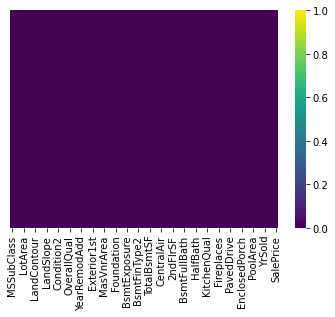

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True, cmap='viridis')

<AxesSubplot:>

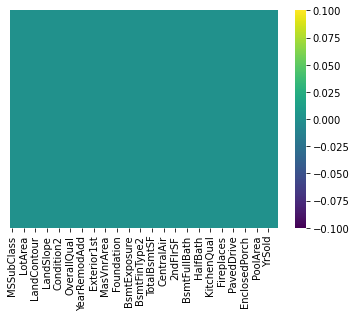

In [13]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True, cmap='viridis')

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

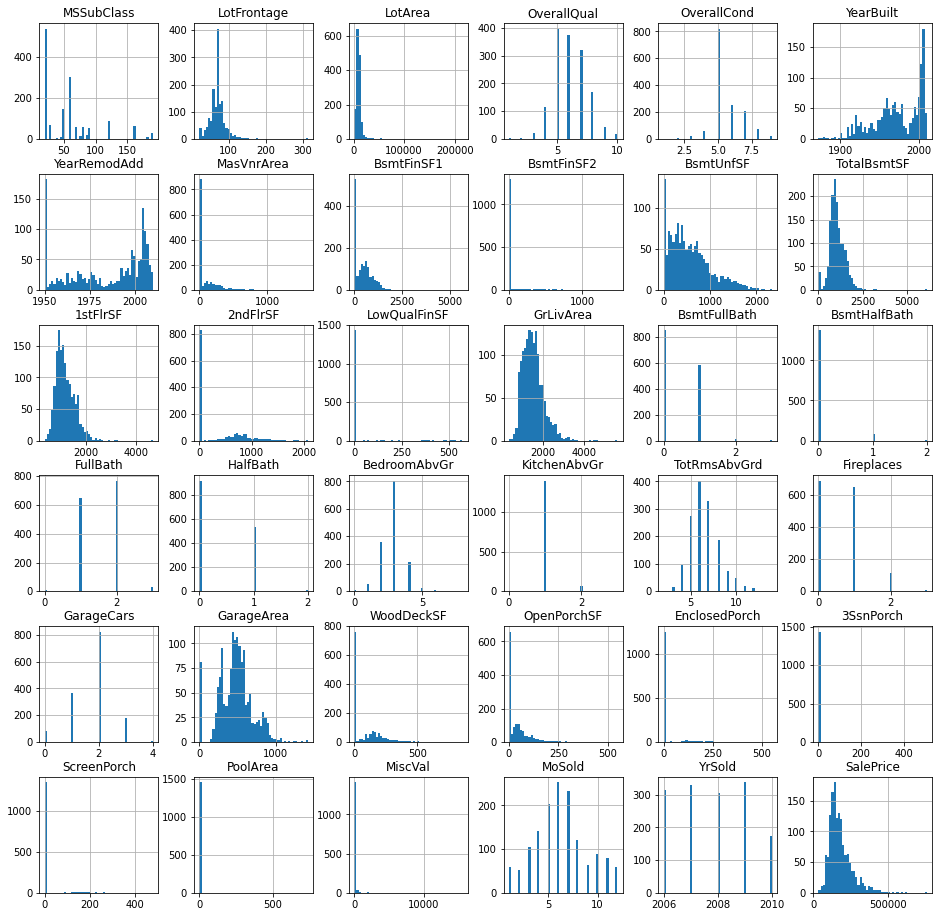

In [14]:
df1.hist(bins=50, figsize=(16,16))

In [15]:
#define X and y values fo feature selection

NOW WE WILL CONVERT CATEGORICAL FEATURE INTO NUMEICAL FOR ML

In [16]:
categorical_features=[feature for feature in df1.columns if df1[feature].dtype=='O']
numeric_features=[feature for feature in df1.columns if df1[feature].dtype!='O']

In [17]:
categorical_features_df2=[feature for feature in df2.columns if df2[feature].dtype=='O']
numeric_features_df2=[feature for feature in df2.columns if df2[feature].dtype!='O']

#now we convert categorical feature into int by calling function and using ether one hot encoder and label encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_features
# process columns, apply LabelEncoder to categorical features
for c in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(df1[c].values)) 
    df1[c] = lbl.transform(list(df1[c].values))

# shape        
print('Shape df1: {}'.format(df1.shape))

Shape df1: (1460, 70)


In [19]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [20]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [21]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [22]:
from sklearn.preprocessing import LabelEncoder
categorical_features_df2
# process columns, apply LabelEncoder to categorical features
for c in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df2[c].values))

# shape        
print('Shape df2: {}'.format(df2.shape))

Shape df2: (1459, 69)


In [23]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,11,13,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,4,5,6,0,1.0,730.0,2,140,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,12,14,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,6,0,1.0,312.0,2,393,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,11,13,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,6,1,2.0,482.0,2,212,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,11,13,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,6,1,2.0,470.0,2,360,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,7,7,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,6,0,2.0,506.0,2,0,82,0,0,144,0,0,1,2010,8,4


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>],
       [<AxesSubplot:title={'center':'LotConfig'}>,
        <AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,


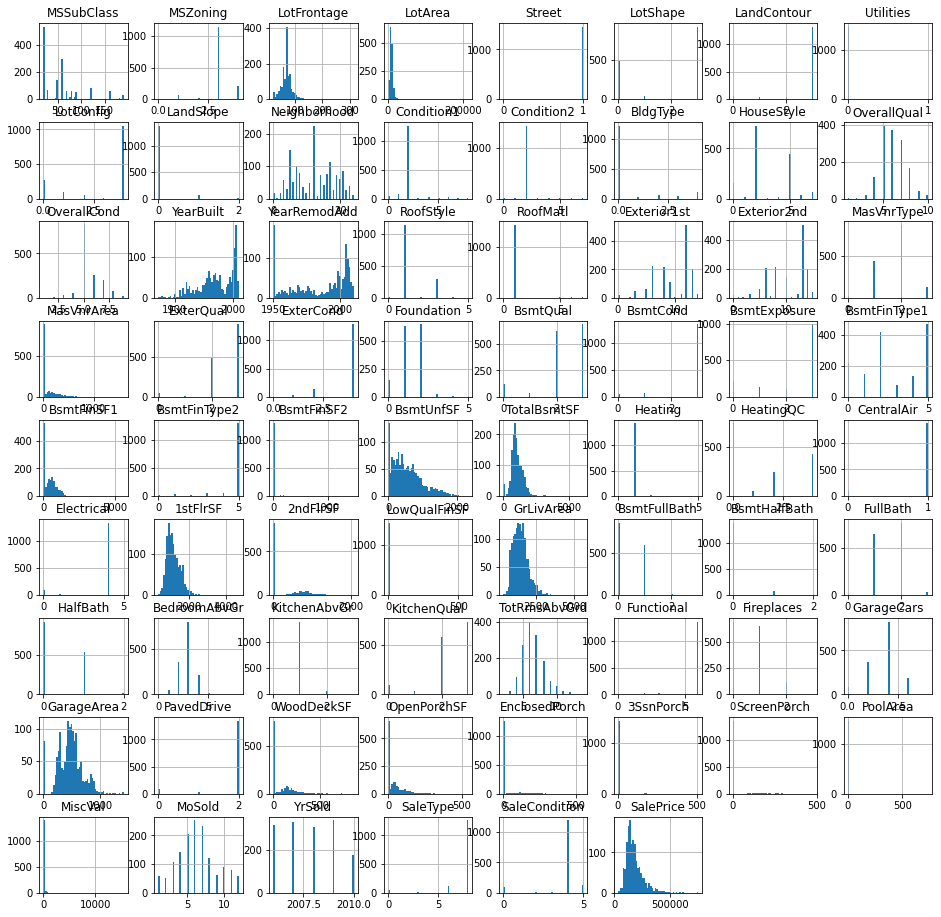

In [24]:
df1.hist(bins=50, figsize=(16,16))

In [25]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


Feature selection

In [26]:
#selct kbest is used to slect number of best features
#chi used for applying statistical analysis, internally it sees pvalue is less than .05or not
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
### Apply SelectKBest Algorithm
#here we are selcting k=20 features
#score function is chi
ordered_rank_features =SelectKBest(score_func=chi2,k=20)
ordered_feature =ordered_rank_features.fit(X,y)

In [28]:
df1scores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
df1columns=pd.DataFrame(X.columns)

In [29]:
features_rank=pd.concat([df1columns,df1scores],axis=1)

In [30]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,MSSubClass,1.928123e+04
1,MSZoning,1.138031e+02
2,LotFrontage,5.066301e+03
3,LotArea,1.011497e+07
4,Street,3.650601e+00
...,...,...
64,MiscVal,6.253332e+06
65,MoSold,7.429758e+02
66,YrSold,6.029712e-01
67,SaleType,1.874704e+02


In [31]:
#to get top 20 features
features_rank.nlargest(20,'Score')

,Features,Score
3,LotArea,1.011497e+07
64,MiscVal,6.253332e+06
42,2ndFlrSF,4.648841e+05
32,BsmtFinSF1,3.999851e+05
63,PoolArea,3.835642e+05
34,BsmtFinSF2,3.688827e+05
24,MasVnrArea,2.857403e+05
35,BsmtUnfSF,2.747512e+05
43,LowQualFinSF,2.448810e+05
44,GrLivArea,1.968501e+05


In [32]:
Z=df1[['LotArea','MiscVal','2ndFlrSF','BsmtFinSF1','PoolArea','BsmtFinSF2','MasVnrArea','BsmtUnfSF','LowQualFinSF','GrLivArea','TotalBsmtSF','3SsnPorch','ScreenPorch','WoodDeckSF','1stFlrSF','EnclosedPorch','GarageArea','OpenPorchSF','MSSubClass','LotFrontage']]

In [33]:
df2=df2[['LotArea','MiscVal','2ndFlrSF','BsmtFinSF1','PoolArea','BsmtFinSF2','MasVnrArea','BsmtUnfSF','LowQualFinSF','GrLivArea','TotalBsmtSF','3SsnPorch','ScreenPorch','WoodDeckSF','1stFlrSF','EnclosedPorch','GarageArea','OpenPorchSF','MSSubClass','LotFrontage']]

In [34]:
X=Z

In [35]:
X.shape, y.shape


((1460, 20), (1460,))

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   MiscVal        1460 non-null   int64  
 2   2ndFlrSF       1460 non-null   int64  
 3   BsmtFinSF1     1460 non-null   int64  
 4   PoolArea       1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   int64  
 8   LowQualFinSF   1460 non-null   int64  
 9   GrLivArea      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  3SsnPorch      1460 non-null   int64  
 12  ScreenPorch    1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  1stFlrSF       1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  GarageArea     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  MSSubCla

In [37]:
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,2,460,2,0,40,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,2,500,2,349,0,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,252,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,240,2,366,0,112,0,0,0,0,4,2010,8,4,142125


In [38]:
y=df1.iloc[:,-1]

In [39]:
y.dtypes

dtype('int64')

In [40]:
#will now split the data of X and Y for regression problems

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =20)

1)Random forest regression

In [42]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5,max_features=20, criterion = 'gini', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=5, random_state=50)

In [43]:
y_pred=classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score( y_pred, y_test)
accuracy_train=accuracy_score(y_train, y_pred_train)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [46]:
model = XGBClassifier()

In [47]:
model.fit(X_train, y_train)

[03:29:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred_train=model.predict(X_train)

In [50]:
y_pred

array([118500, 188000, 146800, 223500, 159500, 275000, 185000, 173900,
       161000, 245350, 220000, 131000, 262500, 119000, 177000, 127500,
       141000,  79900, 153575, 200500, 156000, 107500, 244000, 127000,
       205000, 189000, 141000, 139000, 132500,  79900, 138000, 325000,
       189000,  86000, 115000, 195000, 123000, 147000, 144500, 213500,
       177000, 138000, 228000,  95000, 184000, 225000, 142500, 285000,
       180000, 143000, 117000, 137500, 140000, 189000, 196000, 253000,
       128900, 194000, 124500,  85000, 128000, 195000, 201000, 162000,
       149900, 149900, 180000, 113000, 107500, 145000, 213000, 119000,
       317000, 153500, 119000, 180000, 133000, 140000, 167000, 235000,
       340000, 113000, 147500, 155000, 180000, 174000,  89500, 124500,
       140000, 274300, 153500, 135000, 201000, 175000, 385000, 201000,
       115000, 155000, 148000, 152000, 211000, 141000, 129000, 280000,
       143000,  98000, 177500,  97000, 128000, 325000, 187500, 153500,
      

In [51]:
y_pred_train

array([ 81000, 177000, 128000, ..., 241500, 251000, 167500])

In [52]:
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [53]:
submission.shape

(1459, 2)

In [54]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [55]:
y_pred3 = model.predict(df2)

In [56]:
y_pred3.shape

(1459,)

In [57]:
pred=pd.DataFrame(y_pred3,columns=['SalePrice'])
sub_df=pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
sub=sub_df.drop(['SalePrice'],axis=1)
sub_final=pd.concat([sub,pred], axis=1)

In [58]:
sub_final.shape

(1459, 2)

In [59]:
sub_final

,Id,SalePrice
0,1461,129000
1,1462,141000
2,1463,181000
3,1464,173000
4,1465,181000
...,...,...
1454,2915,88000
1455,2916,88000
1456,2917,168000
1457,2918,84500


In [60]:
sub_final.to_csv('./submission.csv',index=False)